In [169]:
cd drive/My Drive/Colab Notebooks/ineuron/houseRent/

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/ineuron/houseRent/'
/content/drive/My Drive/Colab Notebooks/ineuron/houseRent


In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(15,5)})
from tqdm import tqdm

In [214]:
df = pd.read_csv('processed_data.csv')
# One hot encoding for laundry_option and parking_optinons
# df = pd.get_dummies(df,columns=['laundry_options','parking_options'])
# df.drop(['Unnamed: 0','description'],axis=1,inplace=True)
df.head(2)

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region_median,state_median
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,925.0,820.0
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,925.0,820.0


# Exploratory Data Analysis

In [215]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,region_median,state_median
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.210740,-92.391644,1155.884732,1133.526939
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.664677,17.369241,421.639044,320.082199
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,299.000000,650.000000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000,850.000000,875.000000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.469200,1045.000000,1070.000000
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.170050,-81.281400,1341.000000,1361.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000,3000.000000,1875.000000


Here looking at the 75 percentile and max of features price,sqfeet,beds,baths indicate that there is are many outliers in our dataset. Since region_median and state_median feature is derived from the price feature, handling outliers in price should take care of these two features outliers.

# Removing Sqfeet outliers

In [216]:
print("The 99.8th percentile value of sqfeet feature is : ",np.percentile(df['sqfeet'],99.8))

The 99.8th percentile value of sqfeet feature is :  3561.5979999997653


Here 99.8th percentile represents , 99.8 % of values are less than 3561.59





In [217]:
#From google average minimum sqfeet for a single person is 120 sqfeet
outlier_sqfeet = df[(df['sqfeet']>3561) | (df['sqfeet']<120)].index
df.drop(outlier_sqfeet,axis=0,inplace=True)


In [218]:
# From google average sqfeet for a house is 2500 and now calulating median price of house greater than 2500sqfeet
df[df['sqfeet']>2500]['price'].median()

2200.0

In [219]:

print("The 10% of data have less than ${} having square feet of greather than 2500 ".format(np.percentile(df[df['sqfeet']>2500]['price'],5)))

The 10% of data have less than $729.0 having square feet of greather than 2500 


In [220]:
outlier_sqfeet = df[(df['sqfeet']>2500) & (df['price']<729)].index
df.drop(outlier_sqfeet,axis=0,inplace=True)

In [221]:
df[df['beds']>=10]

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region_median,state_median
125920,2449,apartment,1000,1100,75.0,0,0,1,0,0,0,w/d in unit,carport,42.0195,-87.665,1500.0,830.0
126923,2449,apartment,1000,1100,75.0,0,0,1,0,0,0,w/d in unit,carport,42.0195,-87.665,1500.0,830.0


# Removing outliers of Price feature

In [222]:
print("The 99.9th percentile value of price feature is : ",np.percentile(df['price'],99.9))
print("The 2th percentile value of price feature is : ",np.percentile(df['price'],3))

The 99.9th percentile value of price feature is :  6976.680000000342
The 2th percentile value of price feature is :  520.0


In [223]:
outlier_price = df[(df['price']>=6976.68) | (df['price']<400)].index
df.drop(outlier_price,axis=0,inplace=True)

# Removing outliers of Bed feature

In [224]:
print("The 99.9th percentile value of bed feature is : ",np.percentile(df['beds'],99.9))
print("The 3th percentile value of bed feature is : ",np.percentile(df['beds'],3))

The 99.9th percentile value of bed feature is :  5.0
The 3th percentile value of bed feature is :  1.0


In [225]:
outlier_beds = df[(df['beds']>5.0) | (df['beds']<1)].index
df.drop(outlier_beds,axis=0,inplace=True)

# Removing outliers of Baths feature

In [226]:
print("The 99.9th percentile value of baths feature is : ",np.percentile(df['baths'],99.9))
print("The 1th percentile value of baths feature is : ",np.percentile(df['baths'],1))

The 99.9th percentile value of baths feature is :  4.0
The 1th percentile value of baths feature is :  1.0


In [227]:
outlier_baths = df[(df['baths']>4.0) | (df['baths']<1)].index
df.drop(outlier_baths,axis=0,inplace=True)

In [228]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,region_median,state_median
count,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.000000,250820.00000,250820.000000,250820.000000
mean,1231.717869,1010.036377,1.946484,1.501686,0.720377,0.700522,0.735500,0.077976,0.014229,0.042967,37.193397,-92.22321,1154.180135,1132.946045
std,606.864301,351.439970,0.811766,0.563508,0.448815,0.458030,0.441068,0.268135,0.118435,0.202783,5.669313,17.29909,416.416810,317.942118
min,400.000000,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.89400,299.000000,650.000000
25%,830.000000,775.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.494575,-101.33200,850.000000,875.000000
50%,1076.000000,960.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.976700,-86.29310,1045.000000,1070.000000
75%,1451.000000,1161.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.175400,-81.26490,1337.000000,1361.000000
max,6975.000000,3556.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.15610,3000.000000,1875.000000


In [229]:
df.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region_median,state_median
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,925.0,820.0
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,925.0,820.0
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,925.0,820.0
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,925.0,820.0
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,925.0,820.0


# Visualizing

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


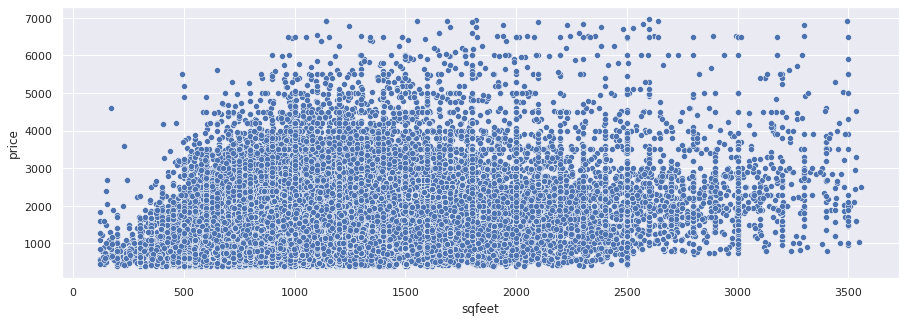

In [230]:
sns.scatterplot(df['sqfeet'],df['price'])

Generally we expect linear relation between price and sqfeet but here in some of the cases though the sqfeet is increased, price is not increases. It may be due to a location factor or it may be simply outliers in our dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


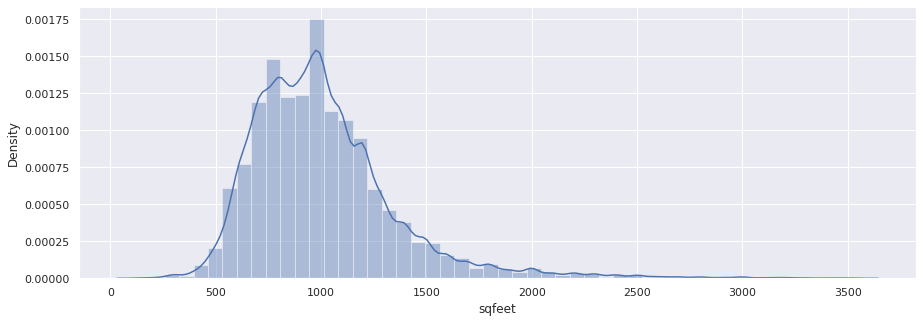

In [231]:
#distribution of sqfeet feature
sns.distplot(df['sqfeet'])

# Creating machine learning models

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,r2_score,accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import time
from collections import Counter
import pickle

In [234]:
#scaling the numerical data using standarization
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['sqfeet', 'lat', 'long', 'region_median', 'state_median']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [235]:
# One hot encoding for laundry_option and parking_optinons
df = pd.get_dummies(df,columns=['type','laundry_options','parking_options'])

In [236]:
#splitting train_laundry data
X_train,X_test,y_train,y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2)

In [237]:
X_train.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'lat', 'long', 'region_median', 'state_median',
       'type_apartment', 'type_condo', 'type_cottage/cabin', 'type_duplex',
       'type_flat', 'type_house', 'type_in-law', 'type_land', 'type_loft',
       'type_manufactured', 'type_townhouse',
       'laundry_options_laundry in bldg', 'laundry_options_laundry on site',
       'laundry_options_no laundry on site', 'laundry_options_w/d hookups',
       'laundry_options_w/d in unit', 'parking_options_attached garage',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_no parking', 'parking_options_off-street parking',
       'parking_options_street parking', 'parking_options_valet parking'],
      dtype='object')

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred  = linear_model.predict(X_test)
# rms = mean_squared_error(y_test, y_pred)
# print(rms)
print(r2_score(y_test, y_pred))

0.6911217238079758


In [239]:
filename = 'linear_model.pkl'
pickle.dump(linear_model, open(filename, 'wb'))

In [131]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# rms = mean_squared_error(y_test, y_pred)
# print(rms)
print(r2_score(y_test, y_pred))

0.8905353326495978


In [132]:
filename = 'random_forest_model.pkl'
pickle.dump(regr, open(filename, 'wb'))

In [137]:
start = time.time()
clf = KNeighborsRegressor(n_neighbors=3)
# parameters = {'n_neighbors':[1,3,5,9,10]}
# clf = GridSearchCV(knn, parameters)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# rms = mean_squared_error(y_test, y_pred)
# print(rms)
print(r2_score(y_test, y_pred))
end = time.time()
print("Total execution time is : ",(end-start)/60)

0.8303546235259145
Total execution time is :  0.3365767955780029


In [138]:
filename = 'knn_3_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Loading model

In [247]:
filename = 'random_forest_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [249]:
loaded_model.predict([[1908, 3, 2, 1, 1, 1, 0, 0, 0, 33.437896774193405, -86.761303584229,
925.0, 820.0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0]])

array([3818.3])